# Bora usar algumas técnicas comuns de DSP: Spectral Features

<p>Uma das formas mais simples e seguras de se utilizar filtros em Python é utilizando a biblioteca SCIPY.</p>
<p>Por isso, demonstraremos aqui alguns tipos de filtros mais comuns sendo projetados e aplicados com essa bilbioteca.</p>

### 1. Imports

In [1]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### 2. Gerando um áudio simples para fazermos nossos testes

In [2]:
class CommonwaveformsGenerator:
    def __init__(self):
        pass
    
    def generate_square_wave(self, frequency, samples, sample_rate):
        sine_wave = self.generate_sine_wave(frequency, samples, sample_rate)
        square_wave = np.where(sine_wave > 0, 1, -1)
        return square_wave
    
    def generate_sine_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        sine_wave = np.sin(2 * np.pi * frequency * (time / sample_rate))
        return sine_wave
    
    def generate_triangle_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=0.5)
    
    def generate_sawtooth_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=1)
 

In [3]:
sample_rate = 44100
frequency = 440
duration = 1
n_samples = duration * sample_rate

generator = CommonwaveformsGenerator()

In [4]:
sine_wave = generator.generate_sine_wave(frequency, n_samples, sample_rate)
square_wave = generator.generate_square_wave(frequency, n_samples, sample_rate)
triangle_wave = generator.generate_triangle_wave(frequency, n_samples, sample_rate)
sawtooth_wave = generator.generate_sawtooth_wave(frequency, n_samples, sample_rate)

### 3. Extraindo algumas features spectrais

### 3.1. Chroma Features / com STFT e CQT through time

C:\Users\trossimu\PycharmProjects\community_14_03\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
C:\Users\trossimu\PycharmProjects\community_14_03\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


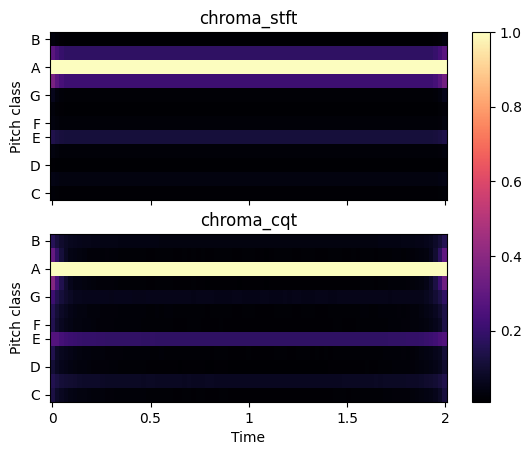

In [5]:
chroma_stft = librosa.feature.chroma_stft(y=sawtooth_wave, sr=sample_rate,
                                          n_chroma=12, n_fft=4096)
chroma_cq = librosa.feature.chroma_cqt(y=sawtooth_wave, sr=sample_rate)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

### 3.2. Spectral Flatness

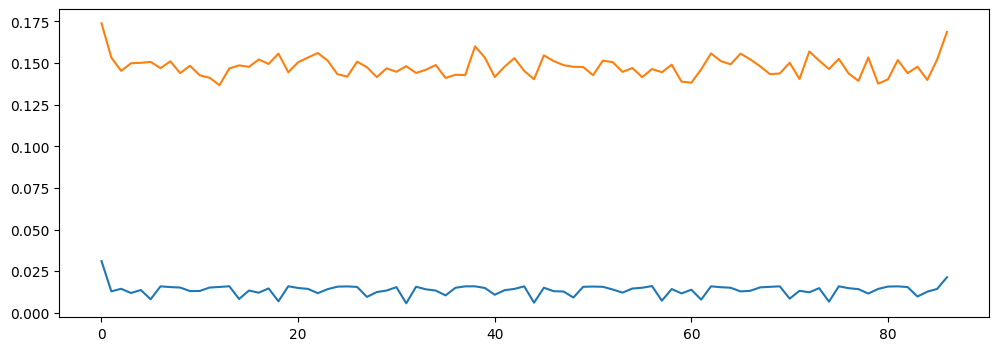

In [12]:
flatness = librosa.feature.spectral_flatness(y=sawtooth_wave)
flatness_with_noise = librosa.feature.spectral_flatness(y=sawtooth_wave + np.random.uniform(-0.5, 0.5, len(sawtooth_wave)))

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(flatness[0])
ax.plot(flatness_with_noise[0])

### 3.3. Spectral Bandwidth

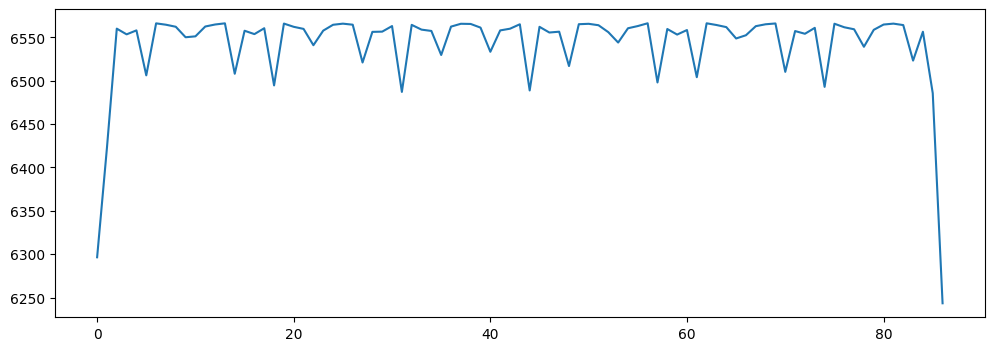

In [16]:
bandwidth = librosa.feature.spectral_bandwidth(y=sawtooth_wave, sr=sample_rate)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(bandwidth[0])

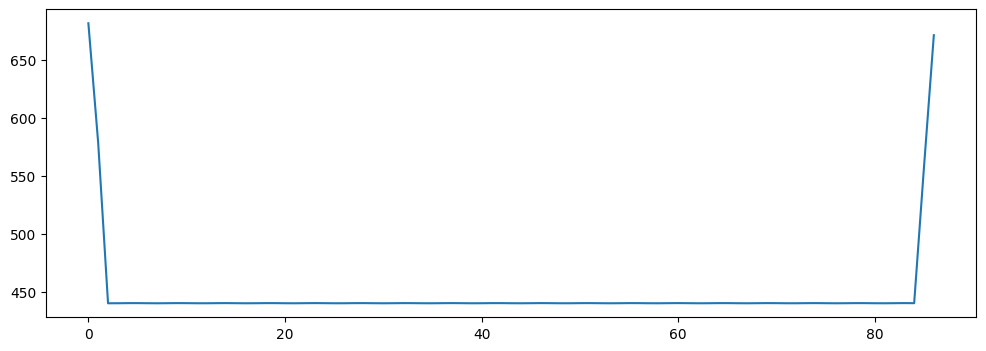

In [19]:
spectral_centroid = librosa.feature.spectral_centroid(y=sine_wave, sr=sample_rate)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(spectral_centroid[0])